In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import yaml

In [2]:
#Add variables from config file
with open("config.yml") as config_data:
    config = yaml.full_load(config_data)
possible_choices = config["POSSIBLE_CHOICES"]
time_created = config["TIME_CREATED"]

In [3]:
# Choose level of position from possible_choices
EXPERIENCE_LEVEL = possible_choices[2]
# By default, time_created is the time of last creation (download) of file to directory data_storage. If you want to work with older data, please uncomment line 4th of code below and write time of creation of file in question in format '%Y_%m_%d_%H_%M_%S'
# time_created = '2023_01_15_23_26'

In [4]:
# Create dataframe
col_names=["Technologies", "Number_of_occurrences"]
folder_path = os.path.abspath("data_storage")
file_name = f"{EXPERIENCE_LEVEL}_{time_created}.csv"
technologies = pd.read_csv(os.path.join(folder_path, file_name), names=col_names, header=None)
technologies.set_index("Technologies", inplace=True)

In [5]:
# Create new rows each of which is a sum of rows with different names but represent one technology. They were used for key-word searching in case of abbreviation.

repeated_rows = {
    " JS ": "JavaScript",
    " AI ": "Artificial intelligence"
}
for word in repeated_rows:
    if (technologies.index == str(word)).any() and (technologies.index == str(repeated_rows[word])).any():
        sum_of_technologies = technologies.loc[word] + technologies.loc[repeated_rows[word]]
        technologies = technologies.drop(labels=[word, repeated_rows[word]], axis=0)
        sum_of_technologies.name = repeated_rows[word]
        technologies = technologies.append([sum_of_technologies])

C:\Users\alina\AppData\Local\Temp\ipykernel_10388\971248825.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  technologies = technologies.append([sum_of_technologies])
C:\Users\alina\AppData\Local\Temp\ipykernel_10388\971248825.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  technologies = technologies.append([sum_of_technologies])


In [6]:
# Sort dataframe by number of occurrences ot technologies
technologies = technologies.sort_values("Number_of_occurrences", ascending=False)

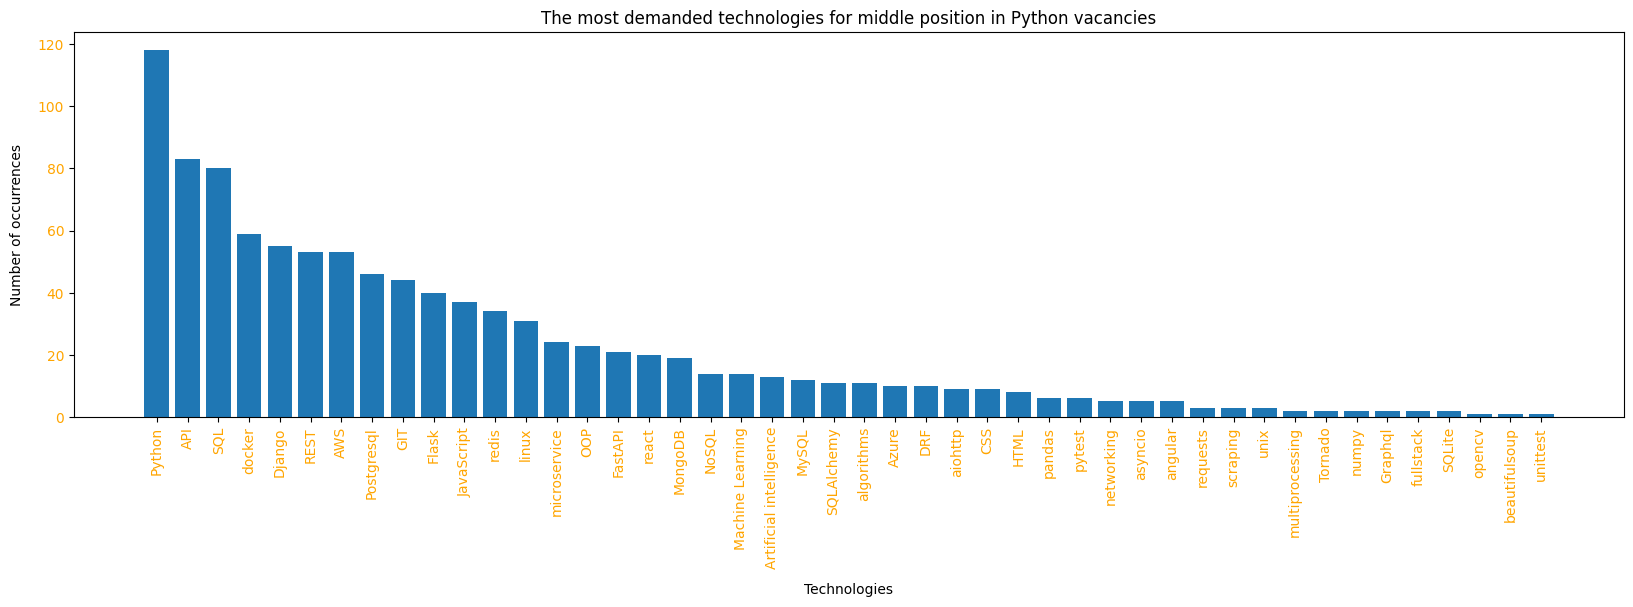

In [7]:
# Choose size of plot
fig = plt.figure(figsize = (20, 5))

# Choose the names of the bars
bars = technologies.index
x_pos = np.arange(len(bars))

# Create bars
plt.bar(x_pos, technologies.Number_of_occurrences)

# Create names on the x-axis
plt.xticks(x_pos, bars, color="orange", rotation="vertical")
plt.yticks(color="orange")

# Create names of labels and title
plt.xlabel("Technologies", labelpad=10)
plt.ylabel("Number of occurrences", labelpad=10)
plt.title(f"The most demanded technologies for {EXPERIENCE_LEVEL} position in Python vacancies")

# Save result
# Figures out the absolute path for you in case your working directory moves around.
folder_path = os.path.abspath("plot_results")
plot_name = f"{EXPERIENCE_LEVEL} technologies for {datetime.now().strftime('%Y-%m-%d %H_%M_%S')}.png"
plt.savefig(os.path.join(folder_path, plot_name), bbox_inches="tight")

# Show result
plt.show()